In [20]:
# Import Modules
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import datetime

In [2]:
# Extract WHO Happiness CSV into DF
happy_file = "Resources/world_happiness_index_2017.csv"
happy_df = pd.read_csv(happy_file)
happy_df.head(10)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182
5,Netherlands,6,7.377,7.427426,7.326574,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,2.294804
6,Canada,7,7.316,7.384403,7.247597,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264
7,New Zealand,8,7.314,7.379510,7.248490,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,2.046456
8,Sweden,9,7.284,7.344095,7.223905,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,2.097538
9,Australia,10,7.284,7.356651,7.211349,1.484415,1.510042,0.843887,0.601607,0.477699,0.301184,2.065211


In [3]:
# Rename column headers
happy_df_rename = happy_df.rename(columns={'Happiness.Rank': 'Happinesss_Rank', 'Happiness.Score': 'Happiness_Score','Whisker.high': 'Whisker_(High)', 'Whisker.low': 'Whisker_(Low)', 'Economy..GDP.per.Capita.': 'Economy_(GDP_per_Cap)', 'Health..Life.Expectancy.': 'Health_(Life_Expectancy)', 'Trust..Government.Corruption.': 'Trust_(Gov_Corruption)', 'Dystopia.Residual': 'Dystopia_(Residual)'})
happy_df_rename.head()

,Country,Happinesss_Rank,Happiness_Score,Whisker_(High),Whisker_(Low),Economy_(GDP_per_Cap),Family,Health_(Life_Expectancy),Freedom,Generosity,Trust_(Gov_Corruption),Dystopia_(Residual)
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [4]:
happy = happy_df_rename[["Country","Happinesss_Rank","Happiness_Score"]]
happy

,Country,Happinesss_Rank,Happiness_Score
0,Norway,1,7.537
1,Denmark,2,7.522
2,Iceland,3,7.504
3,Switzerland,4,7.494
4,Finland,5,7.469
...,...,...,...
150,Rwanda,151,3.471
151,Syria,152,3.462
152,Tanzania,153,3.349
153,Burundi,154,2.905


In [5]:
# Extract alchohol abuse CSV into DF
alcohol_file = "Resources/alcoholSubstanceAbuse.csv"
alcohol_df = pd.read_csv(alcohol_file)
alcohol_df.head(10)

,Location,Period,Indicator,Dim1,First Tooltip
0,Afghanistan,2018,Total (recorded+unrecorded) alcohol per capita...,Both sexes,0.210
1,Afghanistan,2018,Total (recorded+unrecorded) alcohol per capita...,Male,0.360
2,Afghanistan,2018,Total (recorded+unrecorded) alcohol per capita...,Female,0.055
3,Afghanistan,2015,Total (recorded+unrecorded) alcohol per capita...,Both sexes,0.210
4,Afghanistan,2015,Total (recorded+unrecorded) alcohol per capita...,Male,0.350
5,Afghanistan,2015,Total (recorded+unrecorded) alcohol per capita...,Female,0.054
6,Afghanistan,2010,Total (recorded+unrecorded) alcohol per capita...,Both sexes,0.210
7,Afghanistan,2010,Total (recorded+unrecorded) alcohol per capita...,Male,0.360
8,Afghanistan,2010,Total (recorded+unrecorded) alcohol per capita...,Female,0.054
9,Albania,2018,Total (recorded+unrecorded) alcohol per capita...,Both sexes,7.170


In [6]:
# Rename column headers
alcohol_df_rename = alcohol_df.rename(columns={'Location': 'Country','Dim1': 'Gender', 'First Tooltip': 'Consumption_Rate_(Drinks_per_Mo)'})
alcohol_df_rename.head()

,Country,Period,Indicator,Gender,Consumption_Rate_(Drinks_per_Mo)
0,Afghanistan,2018,Total (recorded+unrecorded) alcohol per capita...,Both sexes,0.210
1,Afghanistan,2018,Total (recorded+unrecorded) alcohol per capita...,Male,0.360
2,Afghanistan,2018,Total (recorded+unrecorded) alcohol per capita...,Female,0.055
3,Afghanistan,2015,Total (recorded+unrecorded) alcohol per capita...,Both sexes,0.210
4,Afghanistan,2015,Total (recorded+unrecorded) alcohol per capita...,Male,0.350


In [7]:
etoh_by_year = alcohol_df_rename.groupby(['Country']).mean()["Consumption_Rate_(Drinks_per_Mo)"]
etoh_by_year

Country
Afghanistan                            0.207000
Albania                                7.166667
Algeria                                0.782000
Andorra                               11.894000
Angola                                 6.218000
                                        ...    
Venezuela (Bolivarian Republic of)     7.668667
Viet Nam                               5.309333
Yemen                                  0.282267
Zambia                                 5.408000
Zimbabwe                               3.825333
Name: Consumption_Rate_(Drinks_per_Mo), Length: 188, dtype: float64

In [8]:
happy_etoh = pd.merge(happy, etoh_by_year,on = "Country",how = 'left')
happy_etoh

,Country,Happinesss_Rank,Happiness_Score,Consumption_Rate_(Drinks_per_Mo)
0,Norway,1,7.537,8.156667
1,Denmark,2,7.522,11.375333
2,Iceland,3,7.504,8.026667
3,Switzerland,4,7.494,11.830667
4,Finland,5,7.469,11.986000
...,...,...,...,...
150,Rwanda,151,3.471,11.194000
151,Syria,152,3.462,NaN
152,Tanzania,153,3.349,NaN
153,Burundi,154,2.905,8.126000


In [9]:
# Extract antidepressant CSV into DF
depress_file = "Resources/List_of_countries_by_antidepressant_consumption.csv"
depress_df = pd.read_csv(depress_file)
depress_df.head(20)

,Country,Defined daily dosage per 1 000 inhabitants per day,Year,Data include drugs dispensed in hospitals,Data include non-reimbursed drugs,Data include OTC drugs,Notes
0,Iceland,141.4,2017,NaN,NaN,NaN,NaN
1,Australia,106.7,2016,NaN,NaN,NaN,NaN
2,Portugal,103.6,2017,NaN,Data include both reimbursed and non-reimburse...,"Yes, but only OTC products sold in pharmacies.",NaN
3,United Kingdom,100.1,2016,NaN,NaN,NaN,NaN
4,Canada,99.6,2017,NaN,NaN,"See note Generally, claims for OTC drugs are n...",Provisional value.
5,Sweden,96.8,2017,NaN,NaN,Data include OTC drugs both from pharmacies an...,NaN
6,Belgium,79.0,2016,NaN,NaN,NaN,NaN
7,Denmark,77.0,2015,NaN,NaN,NaN,NaN
8,Spain,75.5,2016,NaN,NaN,NaN,NaN
9,New Zealand,72.8,2014,NaN,NaN,NaN,NaN


In [10]:
SSRI_df = depress_df.groupby('Country').mean()["Defined daily dosage per 1 000 inhabitants per day"]
SSRI_df.head()

Country
Australia    106.7
Austria       60.5
Belgium       79.0
Canada        99.6
Chile         41.4
Name: Defined daily dosage per 1 000 inhabitants per day, dtype: float64

In [11]:
# Drop right side columns in depress_df that are littered with NaNs, and group by year 2017
cols = ["Country", "Defined daily dosage per 1 000 inhabitants per day", "Year"]
depress_df_clean = depress_df[cols].copy()
depress_df_gb_clean = depress_df_clean.groupby("Year", as_index=False)
depress_df_gb_clean.head(20)

,Country,Defined daily dosage per 1 000 inhabitants per day,Year
0,Iceland,141.4,2017
1,Australia,106.7,2016
2,Portugal,103.6,2017
3,United Kingdom,100.1,2016
4,Canada,99.6,2017
5,Sweden,96.8,2017
6,Belgium,79.0,2016
7,Denmark,77.0,2015
8,Spain,75.5,2016
9,New Zealand,72.8,2014


In [98]:
depressrename = depress_df_clean.rename(columns = {"Defined daily dosage per 1 000 inhabitants per day": "doses_per_thousand"})
depressrename.head(10)

,Country,doses_per_thousand,Year
0,Iceland,141.4,2017
1,Australia,106.7,2016
2,Portugal,103.6,2017
3,United Kingdom,100.1,2016
4,Canada,99.6,2017
5,Sweden,96.8,2017
6,Belgium,79.0,2016
7,Denmark,77.0,2015
8,Spain,75.5,2016
9,New Zealand,72.8,2014


In [131]:
#Grouping the dosage for depresants by country
group_depress = depressrename.groupby("Country").mean()

#Sorting the countries according the doses amount in descending order.
group_depress.sort_values("doses_per_thousand", ascending = False)

,doses_per_thousand,Year
Country,,
Iceland,141.4,2017
Australia,106.7,2016
Portugal,103.6,2017
United Kingdom,100.1,2016
Canada,99.6,2017
Sweden,96.8,2017
Belgium,79.0,2016
Denmark,77.0,2015
Spain,75.5,2016


In [132]:
happy_etoh_SSRI_df = pd.merge(happy_etoh,SSRI_df, on="Country", how = "left")
happy_etoh_SSRI_df

,Country,Happinesss_Rank,Happiness_Score,Consumption_Rate_(Drinks_per_Mo),Defined daily dosage per 1 000 inhabitants per day
0,Norway,1,7.537,8.156667,57.1
1,Denmark,2,7.522,11.375333,77.0
2,Iceland,3,7.504,8.026667,141.4
3,Switzerland,4,7.494,11.830667,NaN
4,Finland,5,7.469,11.986000,67.6
...,...,...,...,...,...
150,Rwanda,151,3.471,11.194000,NaN
151,Syria,152,3.462,NaN,NaN
152,Tanzania,153,3.349,NaN,NaN
153,Burundi,154,2.905,8.126000,NaN


In [133]:
clean_happy_etoh_ssri = happy_etoh_SSRI_df.dropna()

In [16]:
clean_happy_etoh_ssri

,Country,Happinesss_Rank,Happiness_Score,Consumption_Rate_(Drinks_per_Mo),Defined daily dosage per 1 000 inhabitants per day
0,Norway,1,7.537,8.156667,57.1
1,Denmark,2,7.522,11.375333,77.0
2,Iceland,3,7.504,8.026667,141.4
4,Finland,5,7.469,11.986000,67.6
5,Netherlands,6,7.377,10.284000,46.1
6,Canada,7,7.316,9.357778,99.6
7,New Zealand,8,7.314,10.858000,72.8
8,Sweden,9,7.284,8.977333,96.8
9,Australia,10,7.284,11.546000,106.7
10,Israel,11,7.213,3.425333,49.2


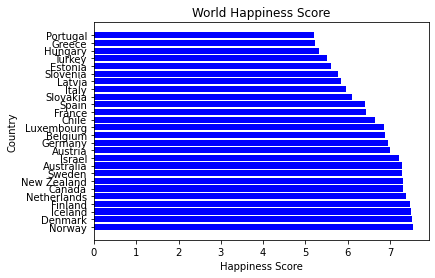

In [136]:
#World Happiness Barchart Horizantal


plt.barh(clean_happy_etoh_ssri["Country"], clean_happy_etoh_ssri["Happiness_Score"], color = "blue")
plt.title("World Happiness Score")
plt.ylabel("Country")
plt.xlabel("Happiness Score")
plt.savefig("Images/whappyscore.png")

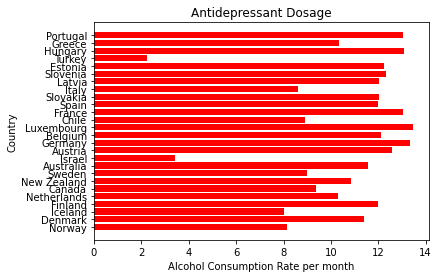

In [144]:
#Making a Bar Chart H with Country and Alochol Consumption Rate
plt.barh(clean_happy_etoh_ssri["Country"], clean_happy_etoh_ssri["Consumption_Rate_(Drinks_per_Mo)"], color = "red")
plt.title("Antidepressant Dosage")
plt.ylabel("Country")
plt.xlabel("Alcohol Consumption Rate per month")
plt.savefig("Images/alcoholconsumption.png")

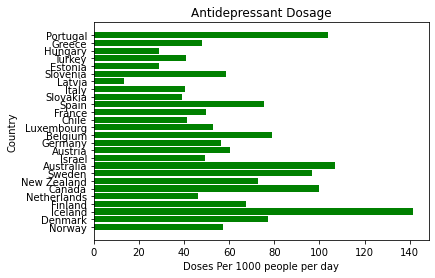

In [143]:
#Making a Bar Chart H with Country and the intake of antidepressants


plt.barh(clean_happy_etoh_ssri["Country"], clean_happy_etoh_ssri["Defined daily dosage per 1 000 inhabitants per day"], color = "green")
plt.title("Antidepressant Dosage")
plt.ylabel("Country")
plt.xlabel("Doses Per 1000 people per day")
plt.savefig("Images/antidrpressantdosage.png")